In [1]:
import pandas as pd
df=pd.read_csv("Tweets.csv")
df=df[['text','airline_sentiment']]

In [2]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [22]:
import nltk
def getVerbPhrases(s):
    try:
        sentences=nltk.sent_tokenize(s)
        sentences=[nltk.word_tokenize(sent) for sent in sentences]
        sentences=[nltk.pos_tag(sent) for sent in sentences]
    except: #if any error is raised in try block, the control comes here
        return []
    else:   #if no error is encountered in try block, 'else' block gets executed 
        grammar=r"VP:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"
        cp=nltk.RegexpParser(grammar)
        noun_phrases_list=[[' '.join(leaf[0] for leaf in tree.leaves())
                            for tree in cp.parse(sent).subtrees()
                            if tree.label()=='VP'] 
                            for sent in sentences]
        print(noun_phrases_list)
        return noun_phrases_list

In [23]:
getVerbPhrases('It was really pathetic to travel')

[['was really']]


[['was really']]

In [27]:
import itertools #Iteration tools through the list
for group, sub in df.groupby('airline_sentiment'):
    verb_phrases=map(lambda x:getVerbPhrases(x),sub['text'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases)) #To print one value after another in a comma separated way
    AllVerbPhrases=set(list(itertools.chain.from_iterable(verb_phrases)))
    
    fn = "Verb Phrases for "+str(group)+" Review.txt"
    file=open(fn,'a')
    for each in AllVerbPhrases:
        file.write(each+"\n")
    file.close()    

[["'s really"]]
[[]]
[["did n't"], ["'s really"]]
[['is still']]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[['is not']]
[[], [], []]
[[], ["'m so"], []]
[["have n't"]]
[[], [], []]
[[], ['are there']]
[[]]
[[], [], []]
[[], [], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], ['be back']]
[[], []]
[['been here'], ['is not']]
[[], ["is n't"], []]
[[], ["is n't"], []]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[]]
[[], ["does n't"]]
[['is totally down'], []]
[['seems too long'], []]
[[], [], [], []]
[['does not']]
[[], [], []]
[[]]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[[], ['weather here']]
[[], []]
[[], ["'s not"]]
[[], ["do n't"]]
[[], ["do n't"]]
[[], [], []]
[[], []]
[[], []]
[[], []]
[[], [], []]
[["do n't"], []]
[[]]
[[], [], [], [], []]
[[]]
[[]]
[[], [], [], []]
[[], []]
[[], ["Have n't", 'heard back']]
[[], [], ["Do n't even"]]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[], []]

[[]]
[[], [], [], []]
[[], []]
[[], ['was more']]
[[], []]
[[], []]
[["'ve been here"]]
[[], []]
[[], [], []]
[[]]
[[]]
[['united is there'], [], [], []]
[[]]
[["'s not", 'occurs absolutely consistently', "'s usually", 'Flightled daily']]
[["'s not"], []]
[[]]
[[]]
[[]]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[]]
[[], []]
[["'s not even"]]
[[]]
[[], [], []]
[[], [], []]
[[], [], []]
[[]]
[[], ['is not']]
[[]]
[[], [], []]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[], []]
[[], [], [], [], [], []]
[[], []]
[[]]
[[]]
[[]]
[[], ["is n't"]]
[[], []]
[[], [], [], []]
[[], ["have n't"]]
[[], []]
[[]]
[[], [], []]
[['united Now'], ["do n't"]]
[["do n't"]]
[[], [], [], []]
[[], []]
[[], []]
[[], [], []]
[[]]
[[]]
[[], []]
[['did not'], []]
[[], ['needed fixing again']]
[[], []]
[[], [], []]
[[], []]
[[], [], [], []]
[[], [], []]
[[], [], ['stay overnight']]
[[], ["do n't"]]
[[], ["do n't"], []]
[[], [], []]
[[], ["'re very"], []]
[[], [], []]
[[], [], ["'ve already"], []]
[[], [], []]
[['was 

[[], [], []]
[[], []]
[[]]
[[], []]
[[], ["was n't"]]
[[], []]
[[], [], [], []]
[["do n't"], []]
[[], [], []]
[[], [], [], []]
[['put together']]
[[], []]
[[], ["do n't", "does n't"]]
[[], [], []]
[[]]
[[], [], [], []]
[[]]
[["do n't"]]
[['sleep yet']]
[[], [], []]
[[], [], []]
[['united apparently', "was n't"], []]
[["do n't"], []]
[[]]
[["'m just"], ["do n't"]]
[[]]
[[], []]
[['was not'], []]
[[]]
[[]]
[[]]
[[], []]
[[], []]
[[]]
[[]]
[['guys are really']]
[['have never', 'been more']]
[['have never']]
[[]]
[['am still']]
[[]]
[['united now']]
[[]]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], [], []]
[[]]
[[]]
[[]]
[[], [], []]
[[], []]
[[], [], [], []]
[[]]
[[], [], ['be automatically']]
[['sit here']]
[[]]
[[], []]
[[], []]
[['united Also', 'is almost'], []]
[[], ["Did n't"]]
[[], []]
[[], [], []]
[[]]
[["was n't"], []]
[[]]
[["'m not"]]
[['united now'], []]
[[]]
[[], []]
[['trying not'], []]
[[], ['is now'], [], []]
[['missed meeting,7']]
[['united still']]
[

[["'m fully", "'s just"], []]
[[], []]
[[], [], []]
[[]]
[[]]
[[], [], ['was not']]
[[], ['am not']]
[['am being charged randomly']]
[[]]
[["was n't", 'cleaned properly']]
[['have never', 'been so'], []]
[["was n't", 'cleaned properly']]
[[], [], []]
[[], ["'m not so"]]
[[]]
[[]]
[['returned back']]
[['is partly']]
[[], [], [], ["have n't"]]
[[], [], [], []]
[[], []]
[[], []]
[[], []]
[["'s still"]]
[[], [], []]
[[]]
[[], []]
[['are visibly'], []]
[[], [], []]
[[], [], []]
[[]]
[[], [], []]
[[], [], []]
[[]]
[[], []]
[[], [], []]
[['united Still'], [], [], []]
[["'ve ever"], []]
[[]]
[[]]
[[], [], []]
[['is far'], []]
[[]]
[[], []]
[[]]
[[], [], ["was n't"]]
[["do n't", "understand is n't"]]
[[], [], []]
[["are n't"], ['parked here']]
[[]]
[[]]
[[], [], [], [], []]
[[], ['looking forward', 'accruing enough']]
[[], [], []]
[[], ["does n't"], []]
[[]]
[[], []]
[[], []]
[['believe just'], [], [], []]
[[]]
[[]]
[[]]
[[], [], []]
[[]]
[[], [], []]
[[], [], []]
[[], []]
[['is very'], []]
[[]

[[], [], [], [], [], [], []]
[['be more'], ['is not'], []]
[[], ['call easily'], []]
[[]]
[[], ['be driving there not']]
[['be here'], [], []]
[[]]
[["do n't"], []]
[['get em']]
[[]]
[['do not'], [], []]
[[], [], []]
[[], [], []]
[[], []]
[[], []]
[[]]
[[], ["'m not"]]
[[], ['sailed away']]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[], ['crew only']]
[[], []]
[[], ['offered voucher'], []]
[[], [], []]
[[]]
[[], [], ["'m mostly"]]
[['united still']]
[[], [], ["was n't"], []]
[["did n't"]]
[[]]
[['did not']]
[['united now'], [], []]
[[], [], [], []]
[[], []]
[[]]
[[]]
[[], []]
[[]]
[[], []]
[["did n't"], []]
[[], []]
[[], []]
[[], [], []]
[[]]
[[], [], []]
[[], ['is not']]
[[], []]
[['i trust']]
[[], []]
[[]]
[[], []]
[[], [], []]
[[]]
[['flying is not']]
[["is n't"]]
[[]]
[[]]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], ["are n't"]]
[[], []]
[["does n't"]]
[[], [], ["'m actually"]]
[[], []]
[[], [], [], []]
[[], [], []]
[[], []]
[["do n't really"], [], []]
[[], [], []]
[[]]
[[], []]
[[]

[[], [], []]
[[], []]
[['was not', 'did not']]
[['regret not', "does n't"], []]
[["did n't"]]
[[]]
[["'s not"]]
[['be refunded back']]
[[], ['seemed really'], []]
[[], [], ["is n't"]]
[[]]
[[], [], []]
[[], []]
[[], [], []]
[[]]
[[], [], []]
[[]]
[[], []]
[['were treated rather rudely'], []]
[["had n't"], []]
[[], []]
[[], ["have n't"]]
[["is n't"]]
[[], []]
[['is incredibly'], [], [], []]
[[], ["do n't"], []]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[], []]
[["'re really"], []]
[['get back']]
[[], ["do n't"]]
[[], []]
[[]]
[[], ['sighed heavily'], []]
[[], ["did n't"]]
[[], [], []]
[[], ["'s not"], []]
[[], []]
[[], []]
[[], [], ["did n't"]]
[[], []]
[[], []]
[["do n't even"]]
[[], []]
[[], ["'m now"]]
[[]]
[[], []]
[[], []]
[[], ['is just too'], []]
[[], [], [], ['cant even'], []]
[[], [], []]
[['has been very'], [], ['have only']]
[[], ["'s not"], []]
[[], ['is delayed too'], [], []]
[[], [], [], []]
[[], [], [], [], []]
[["do n't"], [], []]
[['are whatever'], ['Please just'], []]
[

[['charge so'], ["does n't"]]
[[], []]
[['held earlier']]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[], [], [], [], []]
[[]]
[[]]
[["have n't"], []]
[[], []]
[[], []]
[["did n't", 'is probably'], []]
[[]]
[["do n't ever"]]
[["was n't"], [], []]
[[]]
[[], [], [], []]
[[], [], []]
[[], []]
[['tried again']]
[[], []]
[[], [], []]
[[]]
[[], []]
[["does n't"], []]
[[], [], []]
[['have just', "do n't"]]
[[], []]
[[]]
[[], [], []]
[[], []]
[[], [], [], [], []]
[[], []]
[[]]
[[], ['is always']]
[[], [], []]
[[], [], []]
[[]]
[[], ['does not']]
[[], [], [], []]
[[], [], []]
[[], ["Was n't"], [], ["did n't"], []]
[[], [], [], []]
[[], ["are n't"], [], []]
[[]]
[[]]
[[], []]
[[], [], ['am not']]
[[], [], []]
[[], []]
[[], [], []]
[[], [], []]
[["does n't"], []]
[[]]
[[], ['have paid double']]
[[], [], ['are too']]
[[], []]
[[], [], []]
[[], []]
[[], [], ['is more'], [], []]
[[]]
[[], [], []]
[[], [], []]
[[], ["is n't"]]
[[], []]
[[], [], []]
[[], [], []]
[[], ["do n't"], [], ['are no

[[], ["'s silly"], [], []]
[[], []]
[[], ["was n't"]]
[[], ['arrived back']]
[[], [], [], []]
[[], []]
[[], []]
[[], [], [], []]
[[], []]
[[]]
[[]]
[[], ['change again']]
[[], []]
[["did n't"], [], []]
[[], []]
[[], [], []]
[[], [], [], []]
[[], [], [], []]
[[], ['come back', 'did not']]
[[], []]
[[]]
[[]]
[[], [], []]
[[], ["do n't"], []]
[[]]
[[], ['am totally']]
[[]]
[[], []]
[[], []]
[[], [], ['gets here'], ['getting back']]
[[], [], []]
[[], ['pay more']]
[["are n't"], []]
[[]]
[[], [], [], []]
[['are as reliable/friendly', 'are not']]
[[], []]
[['sitting here'], []]
[['has officially'], ['have too'], ['am yet']]
[[], [], []]
[['are officially'], []]
[[], [], []]
[[]]
[[], []]
[[], [], []]
[[], [], ["Do n't"]]
[[], [], []]
[[], [], []]
[['deli ever'], []]
[["'re still"], []]
[['is not'], []]
[[], ["Do n't"], []]
[[], [], [], []]
[[], [], []]
[[], []]
[["do n't"], []]
[["do n't", 'go back']]
[['are there so']]
[[], ["Do n't", "do n't"], [], []]
[[], []]
[[], []]
[["does n't"], [], 

[['is not']]
[[], [], []]
[['did not', "do n't"]]
[[], [], [], []]
[[], [], []]
[[]]
[[], []]
[[], []]
[["does n't"], ['is totally'], []]
[[]]
[[], []]
[["do n't"], []]
[['was as'], []]
[[], [], []]
[[], []]
[[], []]
[['has now']]
[["do n't"], []]
[[], [], []]
[[]]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], []]
[[], []]
[['is here']]
[[], []]
[[]]
[['respond directly']]
[[], []]
[['are very'], []]
[[]]
[[], [], []]
[['was not'], ["did n't"]]
[['went down'], []]
[[], [], [], [], []]
[["were n't"], []]
[["has n't"]]
[[]]
[[], []]
[[]]
[[], [], []]
[["does n't"], []]
[[], ["'s not"]]
[[], []]
[[], []]
[[]]
[[]]
[['got txt', 'had just'], [], []]
[['was not'], []]
[[], [], []]
[[]]
[[], ["'m just"]]
[[]]
[[]]
[[]]
[[]]
[[], [], []]
[[], ["do n't", "do n't"], [], []]
[[], []]
[['got up', 'am so'], []]
[[], []]
[[]]
[["has n't"], []]
[['fly jfk even', "does n't"]]
[['career never']]
[[]]
[[], []]
[['going directly', 'boston even']]
[[]]
[[]]
[['was not']]
[[], []]
[['headed

[[], [], []]
[['USAirways thanx', "is n't"], [], []]
[[], []]
[[], []]
[['siting here forever']]
[[], []]
[[], []]
[['is still']]
[['am still', 'sitting inside']]
[[], [], [], [], []]
[[], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], []]
[["does n't"], []]
[[], [], []]
[[], []]
[[], []]
[[], []]
[['disconnect twice'], []]
[['landing there']]
[['is not', 'have been bumped again so now']]
[[]]
[[], []]
[['was here'], []]
[['closed so']]
[[], []]
[[], []]
[[], [], []]
[['mia then'], [], []]
[['USAirways getting extremely']]
[[], []]
[[], [], []]
[[]]
[['i have never', 'been treated so poorly']]
[[]]
[[]]
[[]]
[[], []]
[[]]
[[], ['fly alone']]
[[], ["do n't"]]
[[], [], []]
[[]]
[[], [], [], []]
[[], ['is just']]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[]]
[['strand abroad'], []]
[[], []]
[[], [], []]
[[]]
[[], [], []]
[['usairways Seriously'], [], [], []]
[[], []]
[[], [], []]
[[], []]
[[], ['have packed differently'], [], []]
[[], []]
[[], [], [], []]
[[], []]
[[

[[], []]
[[], []]
[["have n't"]]
[[]]
[[]]
[["do n't"]]
[[], [], []]
[[], ["'ve now"], ["'ve never"]]
[[], [], []]
[[], [], []]
[[], ['have much'], [], []]
[[], []]
[[]]
[[], []]
[[]]
[[], [], []]
[['USAirways obviously'], []]
[[], [], [], []]
[[], []]
[["did n't"], []]
[['am as well'], [], [], ['be understanding here']]
[[], []]
[[], []]
[[], []]
[[], [], [], [], []]
[[], []]
[[]]
[[]]
[[], ['was really']]
[[], []]
[['try again'], []]
[["was n't there"], [], []]
[[], []]
[[], []]
[['USAirways surely'], []]
[[], [], []]
[[]]
[[], []]
[[], [], []]
[[], []]
[[]]
[[], [], [], []]
[[], []]
[['is doing rather'], [], []]
[[], [], []]
[[], [], []]
[[], [], ['dumped here']]
[['is stuck needlessly']]
[[], [], [], []]
[[], []]
[[], []]
[['USAirways actually'], [], []]
[[], []]
[[], []]
[[], []]
[[], [], ['Dumped here'], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[['are currently'], []]
[[], []]
[[], []]
[[], ["'m extremely"]]
[[], []]
[[], []]
[[], ['lie so', "'re not"]]


[[], [], [], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], [], []]
[[], []]
[['USAirways never']]
[[], [], []]
[[]]
[[], []]
[[], [], [], [], []]
[[], [], []]
[[], []]
[['USAirways i', 'doesnt help very']]
[[], []]
[[]]
[[], [], []]
[[], []]
[[], [], []]
[['delayed further']]
[[], [], []]
[[], ['is always']]
[[]]
[[], [], []]
[[], [], ['be more']]
[[], []]
[[], [], []]
[[], ['are habitually'], []]
[[]]
[[], ["do n't"], []]
[[], []]
[[], ['go back back'], []]
[['USAirways not'], []]
[[], [], []]
[[], []]
[[], []]
[["'m not"], [], []]
[[], []]
[[]]
[[]]
[[], [], []]
[[], [], []]
[[], ['is now'], []]
[[], [], []]
[["did n't"]]
[[], []]
[[]]
[[]]
[['is probably'], []]
[['have never'], []]
[['get back']]
[[], []]
[[], []]
[[], []]
[[], [], ['pay especially']]
[[], [], ["Have n't"], []]
[[]]
[[], ['was there'], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[]]
[[], [], []]
[[]]
[['feel sorry']]
[[], [], []]
[[], [], []]
[[], [], []]
[[], []]
[[], []]
[[], []]
[[], ["did n't"]]
[[], []]
[[]

[[], []]
[[], [], [], [], []]
[["'s not just"], []]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[], [], ["have n't"]]
[[], []]
[[], [], []]
[["does n't"], []]
[[], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[["do n't"], [], ['fly twice']]
[[], []]
[[], ["did n't"]]
[[]]
[[], ['was worse']]
[[], ["Is n't"]]
[[], []]
[[], [], []]
[[]]
[[], [], []]
[[]]
[[], []]
[[]]
[[], []]
[["was n't"], [], []]
[[], []]
[[], []]
[[], []]
[['please do not', 'repeat please do not'], []]
[[], []]
[["do n't"]]
[[], []]
[[]]
[["'s not"], []]
[[]]
[[], ["have n't"]]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[[]]
[['fly USAir']]
[[], [], []]
[['does not']]
[[], []]
[["'m not"]]
[[], [], []]
[["does n't really"], []]
[[], [], []]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[['fail again'], ['are not']]
[[], ["'s well"]]
[['is now', "did n't"]]
[[], [], []]
[['made so', 'had been there']]
[[], [], [], ["'m now"]]
[[]]
[[], []]
[[], [], [], [], 

[[], ["do n't"]]
[[], ['is just'], []]
[[], [], []]
[[]]
[[], []]
[[]]
[[], [], []]
[[], [], []]
[[], []]
[['ur not']]
[['has been almost'], []]
[[], ['is not']]
[['are still'], []]
[[]]
[[], [], []]
[['is more']]
[[], []]
[[], [], []]
[[]]
[[]]
[[], ['is really']]
[[], []]
[[]]
[[]]
[['help now'], []]
[[]]
[["'ve ever"], ['have seriously'], []]
[[]]
[[], []]
[[], [], []]
[[], []]
[[]]
[[], []]
[[], []]
[[], [], [], [], []]
[["does n't"]]
[[], []]
[[], []]
[[], [], []]
[[], [], ["were n't"]]
[['was charged there']]
[[], []]
[[], []]
[[]]
[[], []]
[[]]
[[], ["do n't"]]
[[], [], []]
[['has been sitting here']]
[['Flightled just'], [], []]
[['care less'], []]
[[], []]
[['were still']]
[["do n't"]]
[[], [], []]
[['guys just'], []]
[[], []]
[[], [], []]
[[], ["'m not"]]
[[]]
[[]]
[['were very', "does n't"], []]
[[], [], []]
[[], [], []]
[[], []]
[[], []]
[[], ['got here', 'was only']]
[[]]
[[]]
[[], [], []]
[[], []]
[["has n't"], [], []]
[[], [], [], []]
[[]]
[["do n't"], []]
[["does n't"],

[[], [], []]
[["was n't"]]
[[]]
[[], [], []]
[[], [], []]
[[]]
[[]]
[[], ["do n't", 'was not']]
[[], [], []]
[['have now']]
[[], ['does call back'], []]
[[], []]
[[], []]
[[], ['have been scheduled so'], []]
[[], []]
[[]]
[[], []]
[[], [], []]
[['call back'], []]
[[]]
[[], [], []]
[["have n't"], []]
[[], ["did n't"]]
[[], [], [], []]
[[], [], []]
[[], [], []]
[[]]
[[], []]
[[]]
[[], [], []]
[[], [], [], []]
[[], [], []]
[[], []]
[[]]
[[]]
[[]]
[[], [], [], []]
[['call AA now']]
[[], [], [], []]
[[], ['fly exclusively']]
[['am still'], []]
[[], []]
[['have almost', 'u so'], [], []]
[[], []]
[['was not']]
[[], []]
[["'m still"], []]
[['have never']]
[[]]
[[], []]
[[], [], []]
[['are also', 'does not'], []]
[[]]
[[]]
[['is truly'], []]
[[], []]
[[], ['do u']]
[[], [], []]
[[]]
[[]]
[[]]
[[]]
[['answering as fast']]
[[], []]
[[], [], [], []]
[[]]
[["do n't"]]
[[], []]
[[], []]
[[]]
[[]]
[[]]
[[], ['go inflight'], []]
[['is not']]
[[], ["did n't even"]]
[['have not']]
[[], [], [], [], []]
[

[[], []]
[[], ["'s not"], []]
[[], []]
[[], [], []]
[[], ["'s not"]]
[[], []]
[[], ['have now']]
[[], []]
[[]]
[[], []]
[[]]
[[], []]
[[], [], []]
[[], []]
[[], ['work because']]
[[]]
[[], ['calling back']]
[[], [], []]
[[], [], []]
[[], [], [], []]
[[], [], []]
[[], [], []]
[[], []]
[['try again'], []]
[[], [], ['be stuck here']]
[[], []]
[[], []]
[[]]
[[], []]
[[], []]
[["'s only"], []]
[[], [], [], []]
[["do n't"]]
[[], []]
[[], [], []]
[[]]
[[], []]
[[], []]
[[]]
[[], [], [], []]
[[], [], []]
[['was also', "are n't"], [], [], []]
[[], ['was very']]
[['is not'], ["do n't"]]
[[], []]
[['is not'], ['fly w/']]
[[], [], [], []]
[["did n't"], []]
[[], [], ["did n't"]]
[["do n't"], []]
[['is always']]
[['have never']]
[[], [], []]
[[]]
[[], [], []]
[["is n't"], []]
[['are very'], []]
[[], []]
[[], []]
[[], [], [], [], [], []]
[[], [], []]
[[]]
[[]]
[[], []]
[[], [], []]
[[], ["are n't"]]
[[], [], []]
[[]]
[[]]
[["'s not"], ["'s also"], [], [], ["Do n't"]]
[[]]
[[], []]
[[]]
[[]]
[[], [], 

[[]]
[[], []]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[]]
[[]]
[[], []]
[[], ['be soon'], []]
[[]]
[[], [], []]
[[]]
[[]]
[[]]
[["do n't"], []]
[["'m just"], []]
[[], ['is too']]
[[], []]
[[], ['am now'], []]
[[], [], [], []]
[[]]
[[], []]
[[]]
[[], []]
[[]]
[[]]
[[], []]
[[], [], []]
[[], []]
[[], ['hoping not']]
[[], ['was so']]
[[], ['coming back'], []]
[[], [], []]
[[], []]
[[], [], []]
[[], ['getting back']]
[[], []]
[[]]
[[]]
[[]]
[[], [], [], []]
[[]]
[[], [], []]
[[]]
[[]]
[[], ['step up']]
[['were changed so'], []]
[[]]
[[]]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[], ["have n't"]]
[['please do not'], []]
[[], ["do n't", 'get stuck here']]
[[]]
[[], []]
[[]]
[[]]
[[]]
[[], [], []]
[[]]
[['have not', 'heard back'], [], []]
[['united did not']]
[[]]
[[], []]
[[], []]
[[]]
[[], ['is just'], []]
[[], ["do n't"], []]
[[]]
[['sucks not'], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[]]
[['united even']]
[['united so', 'is there'], []]
[[], [], []]
[[], 

[[], []]
[[], []]
[[]]
[[]]
[[], []]
[['hope so', 'fly very often']]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[], [], ['keep checking daily']]
[[]]
[[]]
[[]]
[["'m not"]]
[[], []]
[[]]
[[], []]
[[]]
[[], []]
[[]]
[[], [], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[]]
[[]]
[[], []]
[[], []]
[[], []]
[[]]
[[], []]
[[], ["'m now"]]
[[], []]
[[]]
[[], [], []]
[[]]
[['go again']]
[[], []]
[[], []]
[['assigned yet']]
[[], []]
[["'re still"], []]
[["do n't"]]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[]]
[[]]
[[], [], []]
[[], [], []]
[[]]
[[]]
[[]]
[[], [], []]
[[]]
[[]]
[[], []]
[[]]
[['was bought completely']]
[[], [], []]
[[]]
[[], []]
[[], [], []]
[['im not'], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], [], [], []]
[[], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], []]
[[]]
[[], []]
[[]]
[[], []]
[[], []]
[[], []]
[[]]
[[]]
[[], [], []]
[[], []]
[[], []]
[[], ["ai n't"]]
[[], []]
[[], [], []]
[[]]
[[], []]
[[]]
[[], []]
[[], []]
[[], [], []]
[[], []]
[["did n't"], []

[['hit altitude']]
[[]]
[[]]
[['run so'], ['marketing right']]
[['be much']]
[[]]
[[], []]
[[], []]
[[]]
[[]]
[[], [], []]
[[]]
[[], ['refund whichever']]
[[]]
[['intend to..very much'], []]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[["Do n't"], [], []]
[[], [], []]
[[], [], []]
[[]]
[[], []]
[['stay open'], [], []]
[[], []]
[[]]
[[]]
[[]]
[['is there']]
[[]]
[[]]
[[]]
[[]]
[[]]
[[], ['get here before']]
[[]]
[[], [], []]
[[], []]
[[]]
[[]]
[['have only'], []]
[[]]
[[]]
[[]]
[["did n't"], ["'m not"]]
[[], []]
[[], []]
[[]]
[[], []]
[[], [], []]
[[]]
[['was only', 'do ever', 'get back']]
[[], []]
[[]]
[[], []]
[[], ["'ve already"], [], []]
[[], []]
[[]]
[['is there']]
[[]]
[[], [], []]
[[]]
[[], [], ['get sent now']]
[["'m not"], [], []]
[[]]
[[]]
[["'s not"], []]
[[]]
[['is weather']]
[[], []]
[[], [], []]
[[]]
[[], []]
[[]]
[[]]
[['am just'], []]
[['USAirways sure'], [], ['Planning accordingly apparently']]
[["does n't"]]
[[]]
[['USAirways absolutely']]
[[]]
[[]]
[[]]
[[], ["Does n't"]]
[[]]
[[]]

[["does n't"], []]
[[]]
[['are really pretty'], ['thought u'], []]
[[]]
[['be home']]
[[], []]
[['is too'], [], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], [], ["'m not"]]
[[], [], [], []]
[["'ve ever"], []]
[[], [], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[]]
[[]]
[[]]
[["'s just"], []]
[[], []]
[[], ['stay down'], []]
[['be faster'], []]
[[], []]
[['’ ll just']]
[[], []]
[[], []]
[[]]
[[], []]
[[]]
[[], [], [], []]
[[]]
[[], []]
[[], []]
[[]]
[[], []]
[[]]
[[]]
[[], []]
[[], [], []]
[[]]
[[], []]
[[]]
[[], []]
[[], ['sit awhile longer']]
[[], []]
[[], []]
[[]]
[[], ['landed ahead'], []]
[['was lovely'], []]
[[]]
[[]]
[[], [], [], []]
[[], ['does not'], ['try again']]
[[]]
[[]]
[[]]
[[], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[[]]
[[], [], [], []]
[[], [], ['are not too']]
[[], ["did n't"], []]
[[]]
[[]]
[[]]
[[], []]
[[], []]
[[], [], []]
[[]]
[[], [], []]
[[], [], ['Looking forward'], []]
[[]]
[[], []]
[[]]
[[]]
[[], [], []]
[[], []]
[[], 

[[], [], []]
[[], []]
[[]]
[[], [], []]
[['be back'], []]
[[], []]
[[]]
[[], [], []]
[['guys are so']]
[[], [], [], []]
[[], []]
[[], [], []]
[['has consistently'], []]
[[]]
[['was long'], [], []]
[['are better then']]
[[]]
[[], [], [], []]
[[], []]
[[], [], []]
[[], [], [], []]
[[]]
[[]]
[[]]
[[]]
[[]]
[[], []]
[[], [], []]
[[], [], []]
[[], []]
[[], ['LOVE IT']]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[['have over'], []]
[[], [], []]
[[], [], [], []]
[[], [], []]
[[], []]
[[], [], [], []]
[[], []]
[[], ["Do n't"], []]
[[], [], []]
[[], [], []]
[['be apart']]
[[], ['are as'], []]
[[], []]
[[], [], [], []]
[[]]
[[], [], []]
[[], [], [], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], [], [], []]
[[], ["did n't"], []]
[[]]
[['felt better'], [], [], []]
[[]]
[[], []]
[[], []]
[[]]
[['looking forward']]
[[], []]
[[], [], []]
[[], ['was blown away']]
[[], []]
[[]]
[[], []]
[[], [], []]
[[], [], []]
[[]]
[[], [], []]
[[], ['wan na'], []]
[[], ['fly southwest forever'], []]
[[]]
[[], [

[[], []]
[[]]
[["do n't"], []]
[[]]
[[], []]
[['lets hope so'], [], []]
[[], [], []]
[['was far'], []]
[[], []]
[[]]
[[], []]
[[], [], [], ['is operating flt'], []]
[[], [], []]
[[]]
[[], [], []]
[[]]
[[], [], []]
[[], [], []]
[[], ['Catering just', 'got here'], ['be there']]
[[], []]
[[], []]
[["'re too"], []]
[[], []]
[[], []]
[["was n't totally"]]
[[], [], []]
[[], []]
[[], []]
[[], [], [], [], []]
[[], ['have ever'], []]
[[]]
[['keep going back'], []]
[[], []]
[[], []]
[[], [], []]
[[]]
[[], []]
[[], [], []]
[[], []]
[[], [], [], []]
[[], [], ["are n't"], []]
[[]]
[[], ['is working hard']]
[['speak highly as well'], []]
[[]]
[[]]
[[], []]
[[], []]
[["'s just so", 'know not'], []]
[[]]
[['be flying soon', "'re still"]]
[[], []]
[[]]
[[], [], []]
[[], []]
[['love JetBlue'], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], []]
[[]]
[[], []]
[['Seattle right now'], []]
[[]]
[[], []]
[['was so', 'fly there'], []]
[[], [], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[],

[[], [], []]
[[]]
[[], []]
[[], [], []]
[[], []]
[[]]
[[], [], []]
[[]]
[[], []]
[[], ["'s really"]]
[[], [], []]
[[], []]
[[]]
[[], ["'m still"]]
[["'s always"]]
[[], []]
[[], ['being so']]
[[], []]
[['responding rather quickly']]
[[]]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], [], []]
[['get back']]
[[], []]
[['was as']]
[['are too']]
[[], []]
[[]]
[[], []]
[[]]
[[]]
[['were very']]
[[], [], []]
[['is very'], [], []]
[[], []]
[[]]
[[], []]
[[], []]
[[], ['was very much']]
[[], []]
[[]]
[[]]
[[], [], []]
[[], [], []]
[['be back safely'], []]
[[], []]
[[], ['did not']]
[[], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], []]
[[], [], []]
[[], []]
[[], [], [], []]
[[], []]
[[]]
[[], []]
[[], []]
[[], []]
[[], [], []]
[[]]
[['are very'], []]
[[]]
[[], ['are more'], []]
[[], ['are often'], [], []]
[[]]
[[], ['were so'], []]
[[], [], ['Flying back'], []]
[[], [], []]
[[]]
[[], []]
[[]]
[[], [], []]
[['was not']]
[[], [], []]
[[]]
[[], [], [], ['are now']]
[[], [],

In [32]:
#Plotting a pie chart
def PlotPie(sentiment):
    noun_phrase_file="Noun Phrase for "+str(sentiment)+" Review.txt"
    verb_phrase_file="Verb Phrase for "+str(sentiment)+" Review.txt"    
    noun_phrase_count=len(noun_phrase_file.split('\n'))
    verb_phrase_count=len(verb_phrase_file.split('\n'))
    counts=[noun_phrase_count,verb_phrase_count]
    labels=['Noun Phrases','Verb Phrases']
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=labels)
    plt.title('Pie plots of '+str(sentiment)+' Sentiment')
    plt.show()
    
    

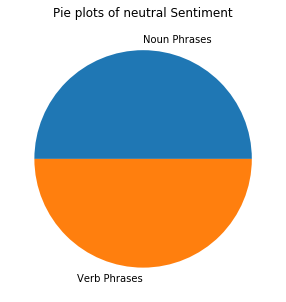

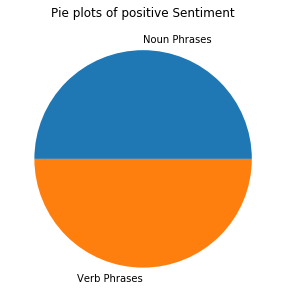

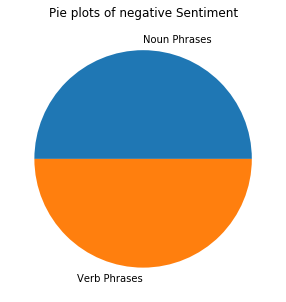

In [33]:
for each in df['airline_sentiment'].unique():
    PlotPie(each)

In [34]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [36]:
df2=pd.read_csv("Tweets.csv")


In [37]:
df2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Pre processing

In [38]:
df2.shape

(14640, 15)

In [39]:
#Check for null values
df2.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [43]:
#Check for percentage of null values
(df2.isna().sum()*100/df2.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [45]:
#deleting columns with more than 90% null values
del df2['airline_sentiment_gold']
del df2['negativereason_gold']
del df2['tweet_coord']


In [46]:
(df2.isna().sum()*100/df2.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
name                             0.00
retweet_count                    0.00
text                             0.00
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

## Sentiments for each airline

In [52]:
df2.groupby('airline')['airline_sentiment'].value_counts()#.sort_values(ascending=False)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


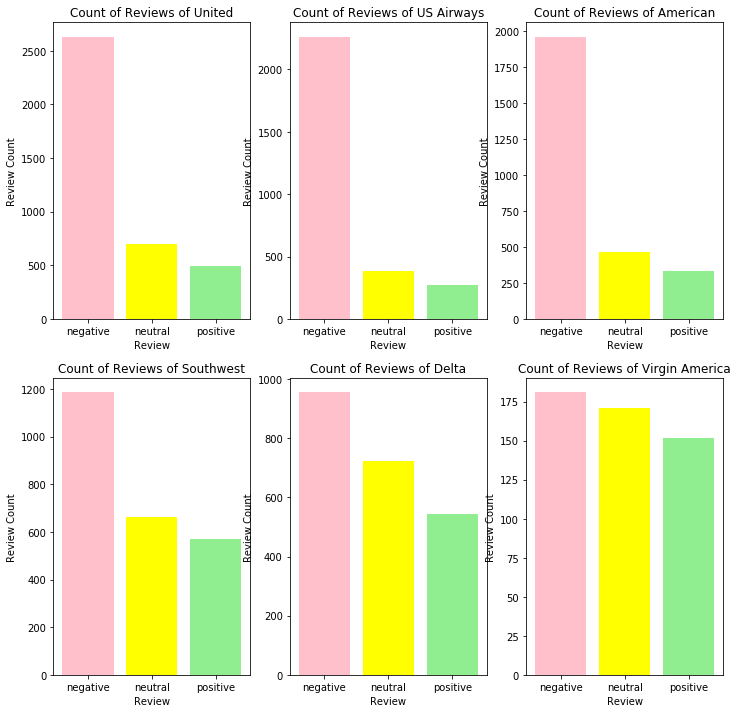

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Total number of tweets for each airline \n ",df2.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['United','US Airways','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df2[df2['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['pink', 'yellow', 'lightgreen'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Review Count')
    plt.xlabel('Review')
    plt.title('Count of Reviews of '+i)

#### Virgin America has the most balanced reviews. US Airways has the largest percentage of negative reviews

## Most frequent words used in positive and negative reviews

In [62]:
from wordcloud import WordCloud, STOPWORDS

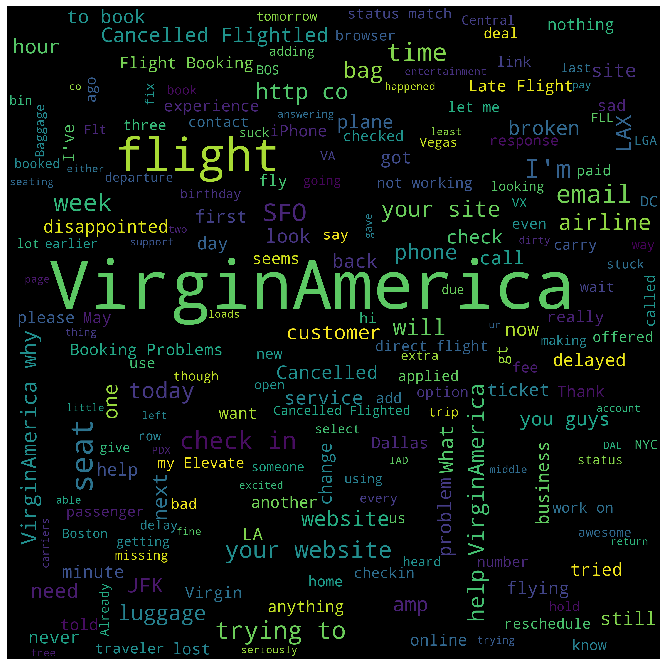

In [76]:
words= ' '.join(new_df[new_df['airline_sentiment']=='negative']['text'])
#print(words)
cleaned = ' '.join([word for word in words.split()
                   if 'http' not in word
                    or not word.startswith('@')
                    or word != 'RT'
                    or word.upper() != 'FLIGHT'
                   ])
#print(cleaned)
wc=WordCloud(stopwords=STOPWORDS,
            background_color='black',
            width=3000,
            height=3000).generate(cleaned)

plt.figure(1,figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()